# Pymaceuticals Inc.
---
1.  The first oberservation can be seen in the box plots where Capomulin and Ramicane show a significant impact on Final Tumor Volume vs. Infubinol and Ceftamin. Capomulin and Ramicane show to be more effective as overall tumor size is smaller.

2.  The second observation to make is that Capomulin treatment of mouse l509 showed no effect on tumor volume for twenty days; however at the twenty to thirty-fifth day there was a precipitous drop in tumor volume. Unfortunately, after day thirty-five there was another upward trend toward growth of tumor volume.

3.  The third observation is that the Capomulin treatment regimen showed a strong positive correlation between mouse weight and tumor volume. From the graph "Capomulin regimen with linear regression model", there was a correlation via the regression line. The Pearson's r was 0.84 with a significant p-value.

 

In [445]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset.  
mouse_data_combined_df = pd.merge(study_results_df, mouse_metadata_df, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [189]:
# Checking the number of mice.
mouse_data_combined_df["Mouse ID"].nunique()


249

In [190]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#find duplicate rows across all columns

#find duplicate rows across specific columns
duplicate_mice_row_s = mouse_data_combined_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)
duplicate_mice_row_s

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [191]:
duplicate_row_df=mouse_data_combined_df.loc[duplicate_mice_row_s]
duplicate_row_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [192]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids = duplicate_row_df['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [193]:
# Optional: Get all the data for the duplicate mouse ID.
all_duplicate_mouse_s = mouse_data_combined_df['Mouse ID'].isin(duplicate_mouse_ids)
mouse_data_combined_df[all_duplicate_mouse_s]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [194]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_data_combined_df[~all_duplicate_mouse_s]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [195]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [196]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

clean_df_mean_tumor_volume = clean_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
clean_df_median_tumor_volume = clean_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
clean_df_variance_tumor_volume = clean_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
clean_df_stddev_tumor_volume = clean_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
clean_df_sem_tumor_volume = clean_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

summary_statistics = pd.DataFrame(
    {  
        'Mean Tumor Volume':clean_df_mean_tumor_volume,
        'Median Tumor Volume':clean_df_median_tumor_volume,
        'Tumor Volume Variance':clean_df_variance_tumor_volume,
        'Tumor Volume Std. Dev.':clean_df_stddev_tumor_volume, 
        'Tumor Volume Std. Err.':clean_df_sem_tumor_volume
    }
)

summary_statistics


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [197]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_table_df = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
# Using the aggregation method, produce the same summary statistics in a single line.
summary_table_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

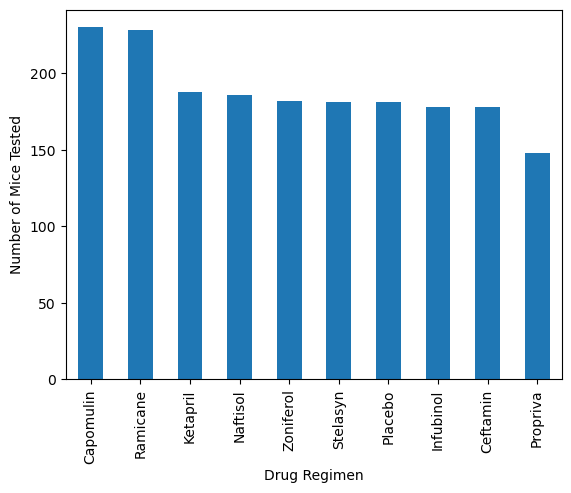

In [198]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Timepoints= clean_df['Drug Regimen'].value_counts()
Timepoints.plot(kind="bar")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')


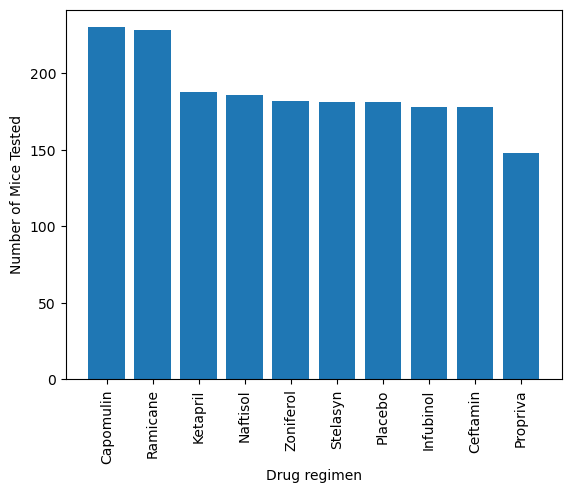

In [199]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimen_counts = clean_df['Drug Regimen'].value_counts()
xaxis = drug_regimen_counts.index.values
yaxis = drug_regimen_counts.values
plt.bar(xaxis,yaxis)
plt.xlabel("Drug regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)
plt.show()     


<AxesSubplot:ylabel='Sex'>

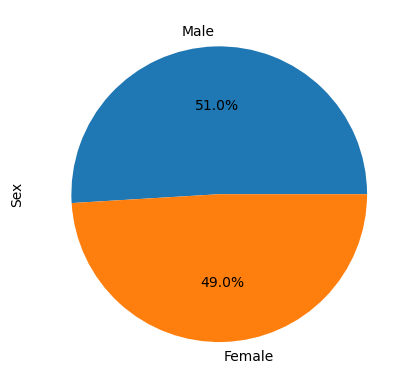

In [210]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas  
male_female_mice_df = clean_df['Sex'].value_counts() 
male_female_mice_df.plot(kind='pie', y='Sex', autopct="%1.1f%%")

In [202]:
male_female_mice_df

Male      958
Female    922
Name: Sex, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

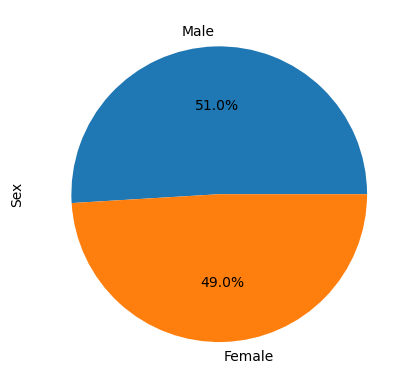

In [244]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#male_female_series = male_female_mice_df.index.values
#mouse_sex_series = male_female_mice
labels = male_female_mice_df.index.values
sizes = male_female_mice_df.values
plt.pie(sizes, labels = labels, autopct ="%1.1f%%")
plt.ylabel("Sex")
plt.show

## Quartiles, Outliers and Boxplots

In [286]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  Capomulin ,Ramicane , Infubinol ,
# Ceftamin
#grouped_df = clean_df.sort_values['Capomulin','Ramicane', 'Infubinol', 'Ceftamin'].index['Timepoint']
 
# Start by getting the last (greatest) timepoint for each mouse
grouped_df = clean_df.groupby('Mouse ID')['Timepoint'].max()
grouped_df = grouped_df.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
grouped_cleaned_merged_df = grouped_df.merge (clean_df, how="left",on=['Mouse ID','Timepoint'])
#mouse_data_combined_df = pd.merge(clean_df, mouse_metadata_df, how="left", on=["Mouse ID", "Mouse ID"])


In [285]:
grouped_cleaned_merged_df

,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,f932,0,45.000000,0,Ketapril,Male,15,29,0
2,g107,0,45.000000,0,Ketapril,Female,2,29,35
3,a457,0,45.000000,0,Ketapril,Female,11,30,10
4,c819,0,45.000000,0,Ketapril,Male,21,25,40
...,...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25,45
1876,u364,45,31.023923,3,Capomulin,Male,18,17,45
1877,p438,45,61.433892,1,Ceftamin,Female,11,26,45
1878,x773,45,58.634971,4,Placebo,Female,21,30,45


In [363]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data= []

#For each promising drug (loop through)    
for drug in drug_list:
    tumor_vol1 = grouped_cleaned_merged_df.loc[grouped_cleaned_merged_df['Drug Regimen'] == drug,'Tumor Volume (mm3)']
    
    # Locate the rows which contain mice on this drug and get the tumor volumes
    
    # add this series of tumor volumes to the plotting list 
    tumor_vol_data.append(tumor_vol1)
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    tumor_quartiles = tumor_vol1.quantile([0.25,0.50,0.75])
    lower_tumor_quartile = tumor_quartiles [0.25]
    upper_tumor_quartile = tumor_quartiles [0.75]
    # Determine outliers using upper and lower bounds
    IQR= upper_tumor_quartile - lower_tumor_quartile
    lower_bound = lower_tumor_quartile-(IQR*1.5)
    upper_bound = upper_tumor_quartile+(IQR*1.5)
    upp_lower_bounds = tumor_vol1.loc[(tumor_vol1<lower_bound) | (tumor_vol1>upper_bound)] 
    print ("Drug:  ", drug)
    print ("   Upper bound:  ",upper_bound)
    print ("   Lower bound:  ",lower_bound)
    print (upp_lower_bounds)
  

Drug:   Capomulin
   Upper bound:   51.83201549
   Lower bound:   20.70456164999999
Series([], Name: Tumor Volume (mm3), dtype: float64)
Drug:   Ramicane
   Upper bound:   54.30681135
   Lower bound:   17.912664470000003
Series([], Name: Tumor Volume (mm3), dtype: float64)
Drug:   Infubinol
   Upper bound:   82.74144559000001
   Lower bound:   36.83290494999999
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Drug:   Ceftamin
   Upper bound:   87.66645829999999
   Lower bound:   25.355449580000002
Series([], Name: Tumor Volume (mm3), dtype: float64)


In [303]:
tumor_vol_data

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

<function matplotlib.pyplot.show(close=None, block=None)>

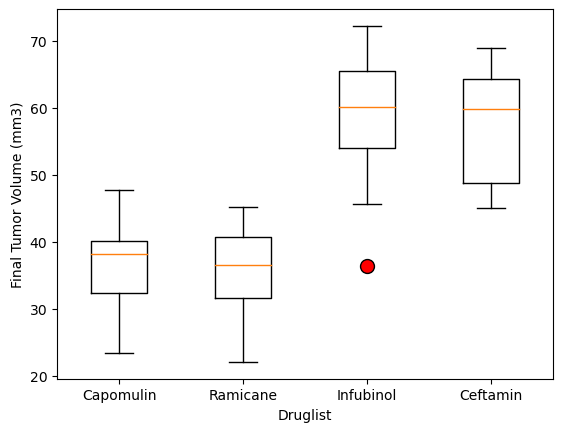

In [359]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_flyer = dict(markerfacecolor = 'red', markersize = 10)
plt.boxplot(tumor_vol_data, labels= drug_list, flierprops=red_flyer)
plt.xlabel("Druglist")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show

In [364]:
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [365]:
grouped_cleaned_merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


## Line and Scatter Plots

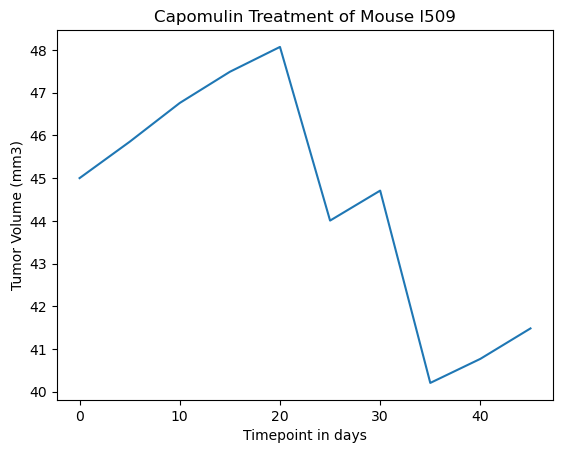

In [416]:
#Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
    
mouse_l509_df = clean_df.loc[clean_df['Mouse ID']=='l509']
mouse_l509_tumor_vol_s = mouse_l509_df['Tumor Volume (mm3)']
mouse_l509_time_s = mouse_l509_df['Timepoint']
plt.plot(mouse_l509_time_s, mouse_l509_tumor_vol_s)
plt.xlabel ("Timepoint in days")
plt.ylabel ("Tumor Volume (mm3)")
plt.title ("Capomulin Treatment of Mouse l509")
plt.show()
    


In [412]:
mouse_l509_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


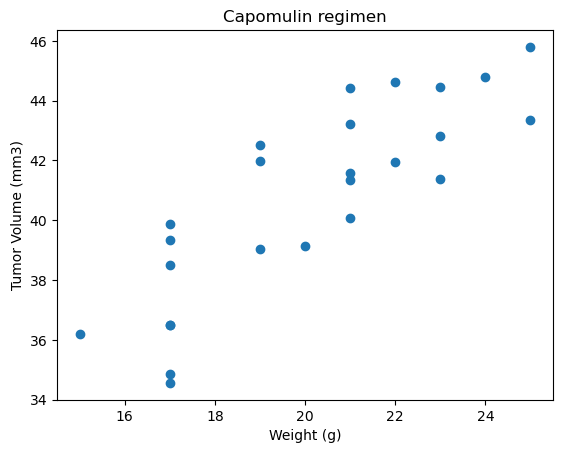

In [430]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df = clean_df.loc[clean_df['Drug Regimen']=='Capomulin']
average = Capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(average['Weight (g)'],average['Tumor Volume (mm3)'])
plt.xlabel ("Weight (g)")
plt.ylabel ("Tumor Volume (mm3)")
plt.title ("Capomulin regimen")
plt.show()



In [428]:
average

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


## Correlation and Regression

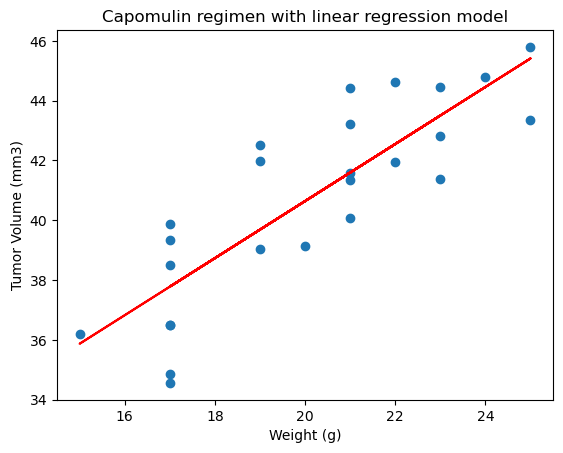

PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712483e-07)


In [450]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Separate xaxis and y axis into smaller variable for easier reading
xaxis = average['Weight (g)']
yaxis = average['Tumor Volume (mm3)']
plt.scatter(xaxis,yaxis )
plt.xlabel ("Weight (g)")
plt.ylabel ("Tumor Volume (mm3)")
plt.title ("Capomulin regimen with linear regression model")
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(xaxis,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.show()
correlation = st.pearsonr(xaxis,yaxis)
print(correlation)
